# HW 6
__CS 216, Everything Data, Spring 2020__

__DUE: Monday Mar. 2 by 4:40 pm (class time)__

__Joe Cusano (jgc28) and Pierce Forte (ph7)__

In this assignment, you will explore more machine learning tools for prediction using the scikit-learn library. You will include all of your answers for this assignment within this notebook. You will then convert your notebook to a .pdf and a .py file to submit to gradescope (submission instructions are included at the bottom).

Please take note of the [course collaboration policy](https://sites.duke.edu/compsci216s2020/policies/). You may work alone or with a single partner. If you work with a partner, you may not split up the assignment; you should work together in-person or complete parts independently and come together to discuss your solutions. In either case, you are individually responsible for your work, and should understand everything in your submission.

# Part 1: Getting Started with Scikit-Learn
Scikit-learn is the standard open source library for prediction in Python. To get started, visit https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting and read through the learning and prediction section. Once you have read the text, go through the following simple example to train and test a predictive model on the iris dataset from HW 5. Note that this example will essentially do *exactly* what your implementation from HW 5 does (up to a different random partition of the data), but does it using scikit-learn. 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
import numpy as np
import pandas as pd

In [3]:
# We import the iris dataset from HW 5 and convert to Numpy arrays
df_iris = pd.read_csv('iris.csv')
X_iris = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_iris = df_iris['flower_type'].values

In [4]:
# We can use scikit-learn to split data into train and test subsets
# First param is the X values we want to use for prediction
# Second param is the y values we want to predict
# test_size is the fraction of the data reserved for the test set
# shuffle = True if you want to randomly split the data into test/train
# random_state can be set if you want to get the same split on multiple runs
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, 
                                                                        test_size=0.33, shuffle=True, 
                                                                        random_state=1)

In [5]:
# We initialize our classifier and set any parameters (k, for the knn algorithm)
knn = KNeighborsClassifier(n_neighbors=5)

# We call the fit method on a classifier and pass it training data in order 
# to train the model
knn.fit(X_iris_train, y_iris_train)

# Finally, the predict method on a classifier, given test data, will give us
# predicted y values.
knn_prediction = knn.predict(X_iris_test)

In [6]:
# The metrics module in scikit-learn contains a variety of 
# ways to evaluate our predictions. The simplest is to just 
# get the accuracy (overall fraction of predictions that are correct)
print("Classification accuracy: ", metrics.accuracy_score(y_iris_test, knn_prediction))

Classification accuracy:  0.98


If you want to read more about scikit-learn before continuing, visit the Getting Started page: https://scikit-learn.org/stable/getting_started. You can find the full documentation in the user guide: https://scikit-learn.org/stable/user_guide.html. 

### Problem A
Recall that we discussed the support vector machine as a powerful classifier during lecture. Use the scikit-learn implementation of support vector machines to make class predictions for the iris dataset as above, and measure the accuracy of your predictions. You can find the documentation of support vector machines here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.  

In [7]:
from sklearn.svm import SVC
# Write your code for Problem A here
clf = SVC(gamma = "auto")
clf.fit(X_iris_train, y_iris_train)
clf_prediction = clf.predict(X_iris_test)

print("Classification accuracy: ", metrics.accuracy_score(y_iris_test, clf_prediction))

Classification accuracy:  0.98


# Part 2: Regression
So far, we have built classifiers that predict a categorical variable. Regression is the branch of prediction that attempts to predict numerical variables. A common example is predicting prices. In this part, we examine building a regression model to predict house prices. Specifically, the following dataset contains information about neighborhoods in the city of Boston in the year 1978. Each row corresponds to a given neighborhood. The final column contains the median house price in thousands of dollars (homes used to be a lot cheaper), and the other 12 columns contain information about the neighborhood (you can read the interpretation of these columns in the text file `housing.names` if interested). 

In [8]:
from sklearn import linear_model

df_boston = pd.read_table('housing.data', delim_whitespace=True, header = None)
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
# As usual, we split our data into training and test sets
X_boston = df_boston.iloc[:,0:13].values
y_boston = df_boston.iloc[:,13].values
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, 
                                                                                test_size=0.5, shuffle=True, 
                                                                                random_state=1)

### Problem B
Train an ordinary least squares regression model on the boston housing data that predicts median house price `y` based on numerical attributes of the nieghborhoods `X`. You can find the relevant scikit-learn documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.  Note that there are no parameters to tune. After you have trained your model using `X_boston_train` and `y_boston_train`, make predictions based on `X_boston_test` and compare them against `y_boston_test`. To evaluate your predictions, compute the mean squared error of your predictions (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Write your code for problem B here
reg = LinearRegression().fit(X_boston_train,y_boston_train)
predictions = reg.predict(X_boston_test)
mean_squared_error(y_boston_test, predictions)

22.839287038640286

### Problem C
In this problem, we consider a different dataset, `mystery_X` and `mystery_y`. Try repeating what you did in Problem B for this dataset, learning an ordinary least squares model with `y_myst_train` and `X_myst_train`predicting `y_myst_test` based on `X_myst_test`. Report the mean squared error that you get. Explain why the error is so high, and then learn a different regression model that achieves mean squared error less than 100. You can use whatever regression tools you like, but we recommend trying different kernels using kernel ridge regression: https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.

In [11]:
X_myst = np.loadtxt('mystery_X.csv', delimiter=',')
y_myst = np.loadtxt('mystery_y.csv', delimiter=',')

X_myst_train, X_myst_test, y_myst_train, y_myst_test = train_test_split(X_myst, y_myst, 
                                                                        test_size=0.5, shuffle=True, 
                                                                        random_state=1)

In [12]:
# Write your code for problem C here
reg = LinearRegression().fit(X_myst_train, y_myst_train)
predictions = reg.predict(X_myst_test)
print(mean_squared_error(y_myst_test, predictions))

from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(kernel="polynomial")
clf.fit(X_myst_train, y_myst_train)
predictions = clf.predict(X_myst_test)
print(mean_squared_error(y_myst_test, predictions))

2033.40593033121
36.40433183105104


The inital error is so high because a linear relationship cannot be discovered in the original dataset without transforming the variables.  We used the kernel trick in order to implicitly transform the data and reduce the mean squared error.

 # Part 3: Cross Validation and Model Evaluation
So far, we have not worried too much about how to set model hyperparameters or how to evaluate models. For example, in the Part 1 we somewhat arbitrarily set the value of k for the k-nn algorithm to 5. How would you find a good value in general? Also in Part 1, we just evaluated our model by computing the overall accuracy on the test data, but that doesn't tell us much about *what kind of errors* our model is making. We will work with the movielens review dataset from HW 4, but we have processed the data into the file `movie_ratings.csv` so that it includes, for every user (that is, every individual who reviewed movies), their sex (1 for female, 0 for male) and a column for every genre of movie containing the number of movies of that genre they rated. Our goal will be to predict sex based on the number of reviews of different genres, which is a substantially harder prediction task than the flower types above.

In [13]:
df_counts = pd.read_csv('movie_ratings.csv')
df_counts.head()

,sex,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,272,272,272,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,62,62,0,0,0,0,0,0,0,0,0,0,0,0,0,62,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0
4,1,0,24,0,0,0,24,0,0,24,0,0,0,0,0,0,0,0,0,0


In [14]:
# As before, we split our data into training and test sets
X_movie = df_counts.iloc[:,1:].values
y_movie = df_counts['sex'].values
X_movie_train, X_movie_test, y_movie_train, y_movie_test = train_test_split(X_movie, y_movie, 
                                                                            test_size=0.33, shuffle=True, 
                                                                            random_state=1)

We will try using a decision tree for this prediction task (recall the idea from HW 5). We need to set a hyperparameter, namely, the `max_depth` parameter which determines how many layers we will let our decision tree have. A naive way to tune a parameter like `max_depth` is to try different settings, each time training on the train data and then testing the accuracy on the train data (note that we never want to tune parameters based on the test data, that is considered *data leakage*). Below, we try a few different values for `max_depth` using this procedure.

In [15]:
from sklearn import tree

param_search_space = [1, 2, 4, 8, 16, 32, 64]
for param in param_search_space:
    dt = tree.DecisionTreeClassifier(max_depth=param)
    dt.fit(X_movie_train, y_movie_train)
    pred_movie_train = dt.predict(X_movie_train)
    print('Training accuracy with max_depth=', param, " is: ", metrics.accuracy_score(y_movie_train, pred_movie_train))

Training accuracy with max_depth= 1  is:  0.716323296354992
Training accuracy with max_depth= 2  is:  0.7258320126782885
Training accuracy with max_depth= 4  is:  0.7353407290015848
Training accuracy with max_depth= 8  is:  0.7812995245641838
Training accuracy with max_depth= 16  is:  0.8573692551505546
Training accuracy with max_depth= 32  is:  0.96513470681458
Training accuracy with max_depth= 64  is:  0.9698890649762282


From this testing, we conclude that clearly bigger is better; we get almost perfect accuracy on the training set by using a very large decision tree. What happens when we then make predictions and measure our accuracy on the test data?

In [19]:
dt = tree.DecisionTreeClassifier(max_depth=64)
dt.fit(X_movie_train, y_movie_train)
pred_movie_test = dt.predict(X_movie_test)
print('Test accuracy with max_depth=', 64, " is: ", metrics.accuracy_score(y_movie_test, pred_movie_test))

Test accuracy with max_depth= 64  is:  0.6121794871794872


This is a classic case of overfitting: we built a model that was too complex, enough so that it was able to more or less "memorize" the training data but doesn't generalize to examples it wasn't trained on. Maybe we could change `max_depth` to avoid this problem. 

A standard approach to finding a good setting for a hyperparameter is cross-validation. We take our training data (*only* the training data; tuning model parameters using test data is a prime example of data leakage in modeling), and create many random partitions of the data into train/validate sets. For each partition, we train the model (with a given hyperparameter setting) on the train set, and then test on the validate set. We can then average (or otherwise compare) the results on all of the random partitions, to ensure that the parameter setting wasn't just good for a particular lucky split of the data. We do this for many parameter settings, and take the best as our setting to use for training our model. You can find the documentation for the scikit-learn implementation of cross validation here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.

In [20]:
for param in param_search_space: 
    dt = tree.DecisionTreeClassifier(max_depth=param)
    dt_cv = cross_validate(dt, X_movie_train, y_movie_train, cv=5)
    print('Cross validation avg accuracy with max_depth=', param, " is: ", dt_cv['test_score'].mean())

Cross validation avg accuracy with max_depth= 1  is:  0.7067968503937007
Cross validation avg accuracy with max_depth= 2  is:  0.7035968503937007
Cross validation avg accuracy with max_depth= 4  is:  0.6987968503937008
Cross validation avg accuracy with max_depth= 8  is:  0.6908472440944882
Cross validation avg accuracy with max_depth= 16  is:  0.6797228346456694
Cross validation avg accuracy with max_depth= 32  is:  0.6133291338582677
Cross validation avg accuracy with max_depth= 64  is:  0.6132535433070866


From this testing, we conclude that clearly smaller is better; let's try `max_depth` of 2, which seems to do better in cross validation, which suggests that it's test performance will be better. 

In [21]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_movie_train, y_movie_train)
pred_movie_test = dt.predict(X_movie_test)
print('Test accuracy with max_depth=2 is: ', metrics.accuracy_score(y_movie_test, pred_movie_test))

Test accuracy with max_depth=2 is:  0.7115384615384616


Cross validation is a standard technique that allows us to find a better setting of hyperparameters without risking data leakage by tuning the parameters to the test set.

### Problem D
So far, we have only evaluated the overall classification accuracy (that is, the fraction of classifications we got correct) to measure the quality of our model. But something strange is going on here. Suppose we want to check separately how good our predictions are for class 0 and for class 1 (that is, for those with `sex=0` and `sex=1` separately). Recall from our discussion of property testing in record linkage that we can compute the *f1 score* for a given class.

In [22]:
print('Test f1 score for class 1 with max_depth=2 is: ', metrics.f1_score(y_movie_test, pred_movie_test))
print('Test f1 score for class 0 with max_depth=2 is: ', metrics.f1_score(1-y_movie_test, 1-pred_movie_test))

Test f1 score for class 1 with max_depth=2 is:  0.0425531914893617
Test f1 score for class 0 with max_depth=2 is:  0.830188679245283


What is going on here? Why are our predictions so much worse for class 1 than class 0, and why did we learn a model that performs so differently for the two classes?

In [28]:
dt = tree.DecisionTreeClassifier(max_depth=16)
dt.fit(X_movie_train, y_movie_train)
pred_movie_test = dt.predict(X_movie_test)
print('Test f1 score for class 1 with max_depth=16 is: ', metrics.f1_score(y_movie_test, pred_movie_test))
print('Test f1 score for class 0 with max_depth=16 is: ', metrics.f1_score(1-y_movie_test, 1-pred_movie_test))

dt = tree.DecisionTreeClassifier(max_depth=32)
dt.fit(X_movie_train, y_movie_train)
pred_movie_test = dt.predict(X_movie_test)
print('Test f1 score for class 1 with max_depth=32 is: ', metrics.f1_score(y_movie_test, pred_movie_test))
print('Test f1 score for class 0 with max_depth=32 is: ', metrics.f1_score(1-y_movie_test, 1-pred_movie_test))

dt = tree.DecisionTreeClassifier(max_depth=128)
dt.fit(X_movie_train, y_movie_train)
pred_movie_test = dt.predict(X_movie_test)
print('Test f1 score for class 1 with max_depth=128 is: ', metrics.f1_score(y_movie_test, pred_movie_test))
print('Test f1 score for class 0 with max_depth=128 is: ', metrics.f1_score(1-y_movie_test, 1-pred_movie_test))

Test f1 score for class 1 with max_depth=16 is:  0.2074074074074074
Test f1 score for class 0 with max_depth=16 is:  0.7811860940695295
Test f1 score for class 1 with max_depth=32 is:  0.26506024096385544
Test f1 score for class 0 with max_depth=32 is:  0.7336244541484717
Test f1 score for class 1 with max_depth=32 is:  0.2738095238095238
Test f1 score for class 0 with max_depth=32 is:  0.7324561403508772


It appears that when the model is only given a max_depth of 2, the model is underfitted and selects a few features that work very well for class 1 while not working as well for class 0.  These features cause the model to perform well overall, but not to perform well for class 0.  As the depth is increased and more features are selected into the model, the f1 score for class 0 increases as more features that work well for class 0 are selected.  It's also possible that there is a greater proportion of class 0 people in the training set, so that when the model performs better overall when it selects for class 0 more often.

# Part 4: Gentle Introduction to Deep Learning
Recall that in lecture we discussed the multilayer perceptron as the conceptually simplest neural network architecture for deep learning. In this part, you will train a multilayer perceptron for image recognition. Below, we load a small subset of the MNIST dataset containing hundreds of images of handwritten digits 0 through 9. Each image is stored as a low-resolution 28 by 28 grayscale image (we plot an example below). We flatten these into a single vector of length 784. Our goal is to learn a model that predicts the digit given the pixel values for the handwritten image.

In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

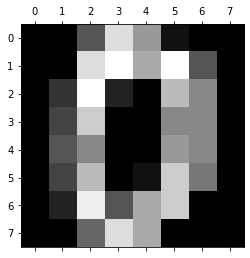

In [30]:
digits = datasets.load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [31]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(data, digits.target, 
                                                                                test_size=0.33, shuffle=True, 
                                                                                random_state=1)

### Problem E
Below we have initialized a multilayer perceptron using the scikit-learn implementation. We set the random state parameter so that we get consistent results every time we train, and then we specified an exceedingly arbitrary network configuration. Your first task is to tune the parameters of the classifier so that it achieves an average classification accuracy of at least 0.97 in 5-fold cross validation on the training data (which is computed for you below). You can find the documentation for the scikit-learn implementation here: https://scikit-learn.org/stable/modules/neural_networks_supervised.html. Some tips:
- The parameter `hidden_layer_sizes` is a tuple where the i'th value gives the number of neurons in the i'th layer of the network. So, for example, `hidden_layer_sizes = (40, 20)` would correspond to a network with two hidden layers, the first having 40 neurons and the second having 20. The default is a single hidden layer with 100 neurons.
- If you get a warning that the solver did not converge, you can either change some of the parameter settings, or increase the maximum number of iterations of optimization by changing the parameter `max_iter` (default is 200).

In [87]:
from sklearn.neural_network import MLPClassifier

# TO DO - Fix our neural network so that it achieves at least 0.97 accuracy 
# on average in 5-fold cross validation. You can change any parameters 
# except the random_state 
net = MLPClassifier(random_state=1, hidden_layer_sizes=(220, 250), max_iter = 200)
net_cv = cross_validate(net, X_digits_train, y_digits_train)
print("Average accuracy: ", net_cv['test_score'].mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Average accuracy:  0.9725834935996857


Once you have tuned your model using cross validation on the training data, make predictions for the test data. Compute and report the accuracy of your prediction.

In [94]:
net.fit(X_digits_train, y_digits_train)
predictions = net.predict(X_digits_test)
print('Prediction accuracy is: ', metrics.accuracy_score(y_digits_test, predictions))

Prediction accuracy is:  0.9848484848484849


We should note that multilayer perceptrons are *not* the state of the art solution for image classification tasks like this. Instead, the standard neural network architecture for these sorts of task is the *convolutional neural network*. At this point, we reach the limit of what is implemented for you in scikit-learn. If you want to go further with deep learning, you will need to look beyond scikit-learn. Fortunately, there are multiple professional-quality open-source libraries for deep learning that work well with Python. Two of the most popular and powerful currently are:
- PyTorch: https://pytorch.org 
- and TensorFlow https://www.tensorflow.org

While CS 216 is not a course on deep learning specifically, you should feel free (encouraged, in fact) to explore these libraries further if you would like to incorporate deep learning into your course project.

## Submitting HW 6
1. Double check that you have written all of your answers along with your supporting work in this notebook. Make sure you save the complete notebook.
1. Double check that your entire notebook runs correctly and generates the expected output. To do so, you can simply select Kernel -> Restart and Run All. 
2. You will download two versions of your notebook to submit, a .pdf and a .py. To create a PDF, we reccomend that you select File --> Download as --> HTML (.html). Open the downloaded .html file; it should open in your web broser. Double check that it looks like your notebook, then print a .pdf using your web browser (you should be able to select to print to a pdf on most major web browsers and operating systems). Check your .pdf for readability: If some long cells are being cut off, go back to your notebook and split them into multiple smaller cells. To get the .py file from your notebook, simply select File -> Download as -> Python (.py) (note, we recognize that you may not have written any Python code for this assignment, but will continue the usual workflow for consistency). 
3. Upload the .pdf to gradescope under hw 6 report and the .py to gradescope under hw 6 code. If you work with a partner, only submit one document for both of you, but be sure to add your partner using the [group feature on gradescope](https://www.gradescope.com/help#help-center-item-student-group-members).